In [47]:
import os
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

os.makedirs("../outputs", exist_ok=True)

print("Folder outputs siap")

Folder outputs siap


In [48]:
df = pd.read_csv("../models/anime_with_clusters.csv")
X_scaled = joblib.load("../models/X_scaled.pkl")

print("Data loaded")
print("Shape df:", df.shape)
print("Shape X_scaled:", X_scaled.shape)

df.head()

Data loaded
Shape df: (20000, 16)
Shape X_scaled: (20000, 28)


,english,japanese,type,episodes,status,premiered,licensors,studios,source,genres,demographic,rating,score,anime show link,genre_list,cluster
0,Frieren: Beyond Journey's End,葬送のフリーレン,TV,28.0,Finished Airing,Fall 2023,Crunchyroll,Madhouse,Manga,"Adventure, Drama, Fantasy",Shounen,PG-13,9.301,https://myanimelist.net/anime/52991/Sousou_no_...,"['Adventure', 'Drama', 'Fantasy']",4
1,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64.0,Finished Airing,Spring 2009,"Funimation,Aniplex of America",Bones,Manga,"Action, Adventure, Drama, Fantasy",Shounen,R - 17,9.101,https://myanimelist.net/anime/5114/Fullmetal_A...,"['Action', 'Adventure', 'Drama', 'Fantasy']",4
2,Steins;Gate,STEINS;GATE,TV,24.0,Finished Airing,Spring 2011,Funimation,White Fox,Visual novel,"Drama, Sci-Fi, Suspense",NaN,PG-13,9.071,https://myanimelist.net/anime/9253/Steins_Gate,"['Drama', 'Sci-Fi', 'Suspense']",2
3,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10.0,Finished Airing,Spring 2019,Funimation,Wit Studio,Manga,"Action, Drama, Suspense",Shounen,R - 17,9.051,https://myanimelist.net/anime/38524/Shingeki_n...,"['Action', 'Drama', 'Suspense']",2
4,Gintama Season 4,銀魂°,TV,51.0,Finished Airing,Spring 2015,"Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi",Shounen,PG-13,9.051,https://myanimelist.net/anime/28977/Gintama°,"['Action', 'Comedy', 'Sci-Fi']",5


In [49]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

print("PCA selesai")

PCA selesai


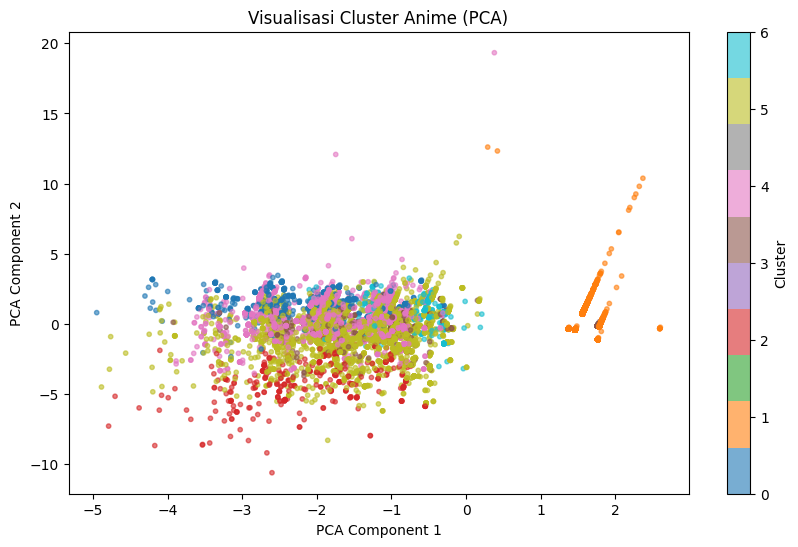

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(
    df["pca1"],
    df["pca2"],
    c=df["cluster"],
    cmap="tab10",
    s=10,
    alpha=0.6
)
plt.colorbar(label="Cluster")
plt.title("Visualisasi Cluster Anime (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


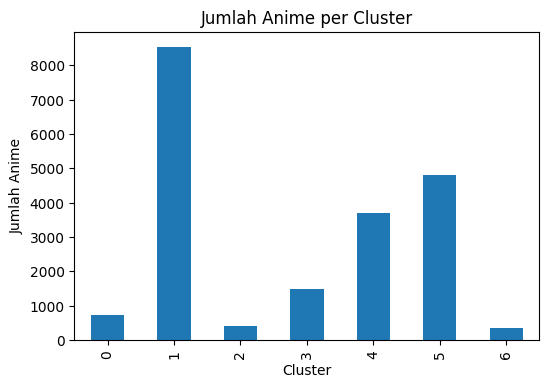

Saved: outputs/cluster_sizes.png


In [51]:
plt.figure(figsize=(6, 4))
df["cluster"].value_counts().sort_index().plot(kind="bar")

plt.title("Jumlah Anime per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Anime")

plt.savefig(
    "../outputs/cluster_sizes.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

print("Saved: outputs/cluster_sizes.png")

In [52]:
genre_cols = [c for c in df.columns if c.startswith("genre_")]

print("Jumlah kolom genre:", len(genre_cols))

Jumlah kolom genre: 1


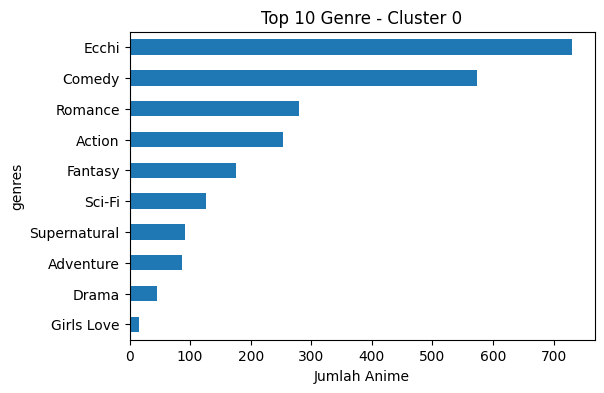

Saved: outputs/cluster_0_top_genres.png


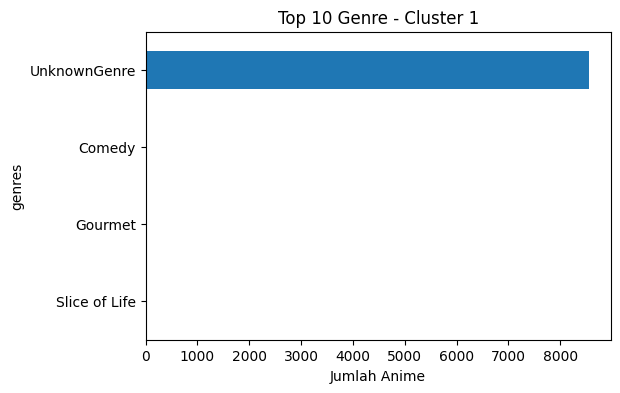

Saved: outputs/cluster_1_top_genres.png


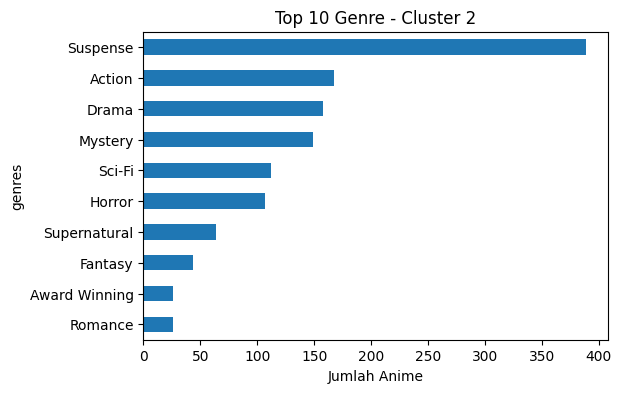

Saved: outputs/cluster_2_top_genres.png


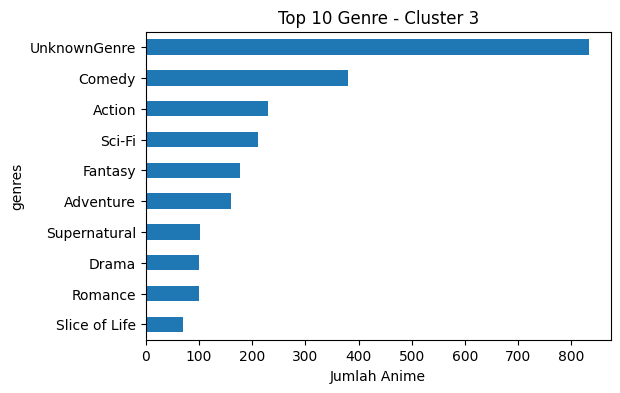

Saved: outputs/cluster_3_top_genres.png


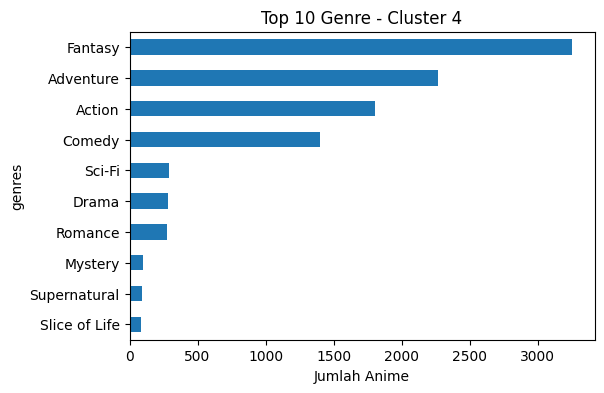

Saved: outputs/cluster_4_top_genres.png


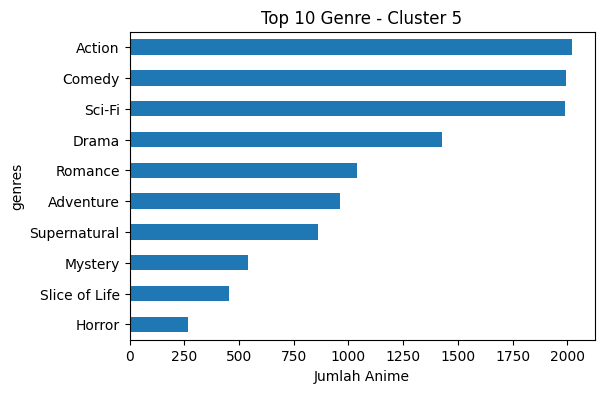

Saved: outputs/cluster_5_top_genres.png


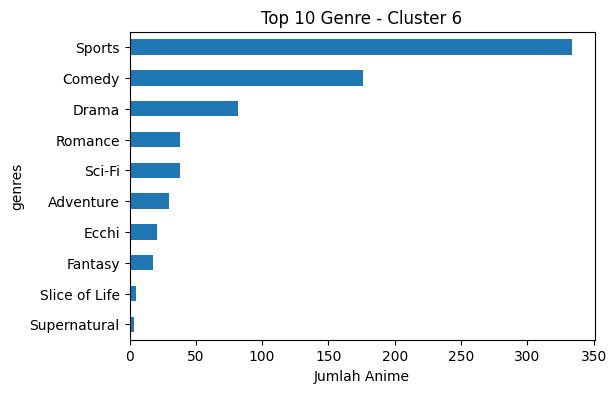

Saved: outputs/cluster_6_top_genres.png


In [53]:
import collections
df["genres"] = df["genres"].fillna("").astype(str)
for c in sorted(df["cluster"].unique()):
    cluster_df = df[df["cluster"] == c]

    all_genres = (
        cluster_df["genres"]
        .str.split(",")
        .explode()
        .str.strip()
    )

    all_genres = all_genres[all_genres != ""]

    genre_counts = all_genres.value_counts().head(10)

    plt.figure(figsize=(6, 4))
    genre_counts.plot(kind="barh")
    plt.title(f"Top 10 Genre - Cluster {c}")
    plt.xlabel("Jumlah Anime")
    plt.gca().invert_yaxis()

    plt.savefig(
        f"../outputs/cluster_{c}_top_genres.png",
        dpi=300,
        bbox_inches="tight"
    )
    plt.show()

    print(f"Saved: outputs/cluster_{c}_top_genres.png")

In [54]:
print("Isi folder outputs:")
for f in os.listdir("../outputs"):
    print("-", f)

Isi folder outputs:
- cluster_3_top_genres.png
- pca_clusters.png
- cluster_4_top_genres.png
- cluster_2_top_genres.png
- cluster_sizes.png
- cluster_6_top_genres.png
- cluster_1_top_genres.png
- cluster_0_top_genres.png
- cluster_5_top_genres.png
